Softmax:  [0.698, 0.748, 0.802, 0.82, 0.8345, 0.827, 0.845]
Max:  [0.6265, 0.6655, 0.7175, 0.705, 0.713, 0.714, 0.7455]


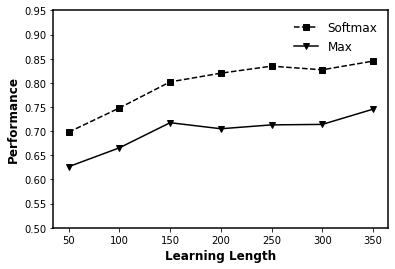

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import pickle
legend_properties = {'weight':'bold'}
data_folder = r"E:\data\hai-0307\Fang2009_11"
performance_softmax_file = data_folder + r"\softmax_performance_across_learning"
performance_max_file = data_folder + r"\max_performance_across_learning"
# performance_max_file_2 = data_folder + r"\max_performance_across_learning_2"


with open(performance_softmax_file, 'rb') as infile:
    softmax_performance = pickle.load(infile)
with open(performance_max_file, 'rb') as infile:
    max_performance = pickle.load(infile)
# with open(performance_max_file_2, 'rb') as infile:
#     max_performance_2 = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_performance)
print("Max: ", max_performance)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_performance, "k--s", label="Softmax")
plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
ax.set_ylim(0.50, 0.95)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_performance.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [299.276, 182.9255, 135.319, 107.2865, 87.607, 79.637, 71.543]
Max:  [6.9635, 4.337, 3.8125, 3.635, 3.5795, 3.6185, 3.6765]


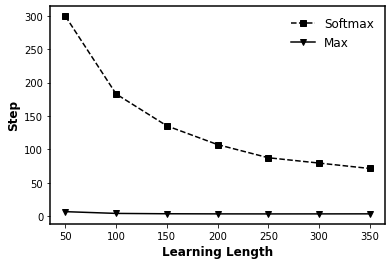

<Figure size 432x288 with 0 Axes>

In [5]:
data_folder = r"E:\data\hai-0307\Fang2009_9"
step_softmax_file = data_folder + r"\softmax_steps_across_learning"
step_max_file = data_folder + r"\max_steps_across_learning"

with open(step_softmax_file, 'rb') as infile:
    softmax_step = pickle.load(infile)
with open(step_max_file, 'rb') as infile:
    max_step = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_step)
print("Max: ", max_step)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_step, "k--s", label="Softmax")
plt.plot(x, max_step, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Step', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_step.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [0.99745458984375, 0.9981982421875, 0.99828271484375, 0.99837646484375, 0.998447265625, 0.9985244140625, 0.9985791015625]
Max:  [0.997439453125, 0.99822216796875, 0.99832080078125, 0.998375, 0.998447265625, 0.9985283203125, 0.99862060546875]


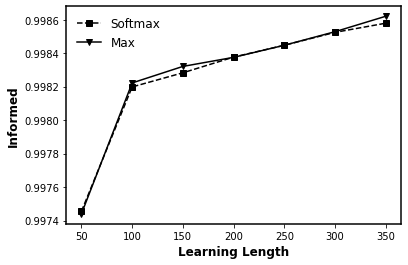

<Figure size 432x288 with 0 Axes>

In [6]:
informed_softmax_file = data_folder + r"\softmax_informed_across_learning"
informed_max_file = data_folder + r"\max_informed_across_learning"

with open(informed_softmax_file, 'rb') as infile:
    softmax_informed = pickle.load(infile)
with open(informed_max_file, 'rb') as infile:
    max_informed = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_informed)
print("Max: ", max_informed)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_informed, "k--s", label="Softmax")
plt.plot(x, max_informed, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Informed', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_informed.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [0.99742333984375, 0.99749609375, 0.99760791015625, 0.9974814453125, 0.9974716796875, 0.99737158203125, 0.99742529296875, 0.99745068359375, 0.99745947265625]
Max:  [0.997439453125, 0.99822216796875, 0.99832080078125, 0.998375, 0.998447265625, 0.9985283203125, 0.99862060546875]


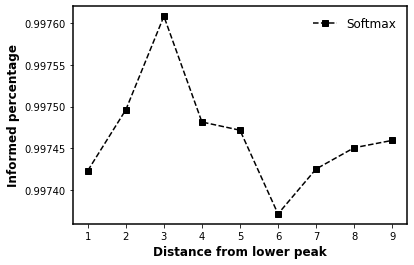

<Figure size 432x288 with 0 Axes>

In [7]:
# data_folder = r"E:\data\hai-0307\Fang2009_9"
informed_softmax_file = data_folder + r"\informed_across_distance"

with open(informed_softmax_file, 'rb') as infile:
    softmax_informed = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_informed)
print("Max: ", max_informed)
# Performance
distance_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(distance_list, softmax_informed, "k--s", label="Softmax")
# plt.plot(distance_list, max_informed, "k-v", label="Max")
plt.xlabel('Distance from lower peak', fontweight='bold', fontsize=12)
plt.ylabel('Informed percentage', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_max_informed.png", transparent=True, dpi=300)
plt.show()
plt.clf()

In [12]:
import numpy as np
state_index = np.random.choice(range(1, 2 ** 5 - 2))
print(state_index)
print(range(1, 2 ** 5 - 2))

6
range(1, 30)
